 ##                                      EDA of House sale

## Q(A-1)

#### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Reading "housesale.csv" as sale

In [3]:
sale = pd.read_csv("housesale.csv")
sale.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
sale.shape

(21613, 21)

##### The dataset contains 21 thousand datas of house sale in king county in USA that is 21613 rows and 21 columns

#### Information of the data

In [5]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
sale.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

##### It contains columns such as price at house sold, year of built, renovated year,number of bedrooms,bathrooms,floor number etc

In [7]:
sale.nunique()    #shows the unique values each column contains.

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
sale.describe().T               #transpose

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Data Cleaning

In [9]:
sale.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### no null values

#### Drop unclean data

In [4]:
sale.drop(["id", "date"], axis=1, inplace=True)

In [5]:
sale.drop_duplicates(inplace = True)
sale.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
sale['yr_built'].value_counts()

2014    558
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

##### Most of the  house sale was in 2014

In [13]:
sale['bedrooms'].value_counts()

3     9821
4     6881
2     2759
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

##### House sale demand house with 3 bedrooms

In [14]:
sale['bathrooms'].value_counts()

2.50    5378
1.00    3852
1.75    3047
2.25    2046
2.00    1929
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [15]:
sale['floors'].value_counts()

1.0    10680
2.0     8237
1.5     1910
3.0      612
2.5      161
3.5        8
Name: floors, dtype: int64

##### Most of the sale is for one floor house 

In [16]:
sale['condition'].value_counts()

3    14027
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

In [17]:
sale['grade'].value_counts()

7     8981
8     6066
9     2612
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [18]:
print("Max Bedroom avaiable:")
min(sale['bedrooms'])

Max Bedroom avaiable:


0

In [19]:
print("Max Bedroom avaiable:")
max(sale['bedrooms'])

Max Bedroom avaiable:


33

In [20]:
print("Min Price for house:")
min(sale['price'])

Min Price for house:


75000.0

In [21]:
print("Max Price for house:")
max(sale['price'])

Max Price for house:


7700000.0

In [22]:
print("Oldest house built:")
min(sale['yr_built'])

Oldest house built:


1900

In [23]:
print("Newest  house built:")
max(sale['yr_built'])

Newest  house built:


2015

In [24]:
sale = sale.query('bedrooms <= 10')
sale

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [25]:
sale.shape

(21606, 19)

#### now its 21,609 rows and 19 columns

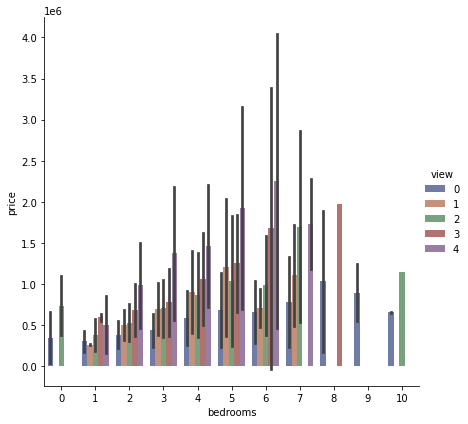

In [26]:
sns.catplot(data = sale, kind = 'bar', x='bedrooms', y ='price', hue = 'view', ci = 'sd', palette = 'dark', alpha =.6, height = 6)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

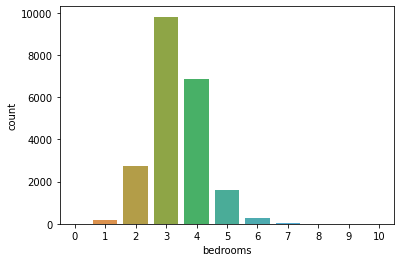

In [27]:
sns.countplot(x="bedrooms", data = sale)

<AxesSubplot:xlabel='floors', ylabel='count'>

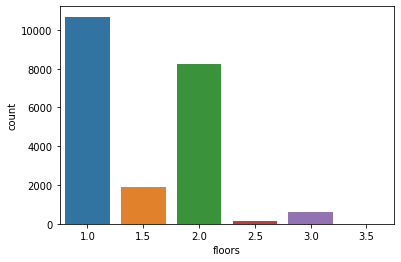

In [28]:
sns.countplot(x="floors", data = sale)

In [29]:
s1 = sale['yr_built'].value_counts().head(10).rename('Count').reset_index()
s1

,index,Count
0,2014,558
1,2006,454
2,2005,450
3,2004,433
4,2003,422
5,2007,417
6,1977,417
7,1978,387
8,1968,381
9,2008,366


<AxesSubplot:xlabel='index', ylabel='Count'>

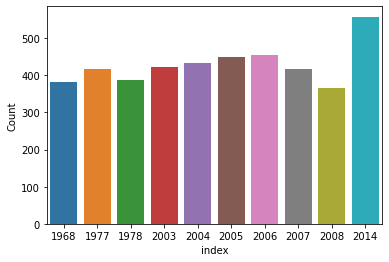

In [30]:
sns.barplot(x = 'index',y = 'Count',data = s1)

<AxesSubplot:xlabel='view', ylabel='count'>

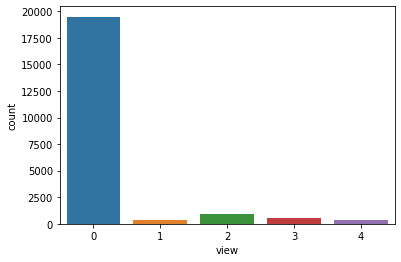

In [31]:
sns.countplot(x="view", data = sale)

<AxesSubplot:xlabel='view', ylabel='price'>

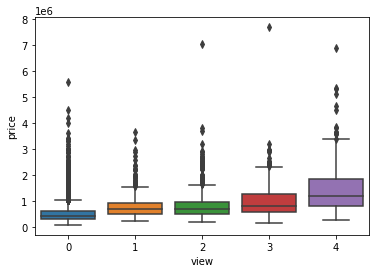

In [32]:
sns.boxplot(x=sale['view'], y=sale['price'])

In [33]:
s2 = sale['zipcode'].value_counts().head(10).rename('location').reset_index()
s2

,index,location
0,98103,601
1,98038,590
2,98115,583
3,98052,574
4,98117,553
5,98042,548
6,98034,545
7,98118,508
8,98023,499
9,98006,497


<AxesSubplot:xlabel='index', ylabel='location'>

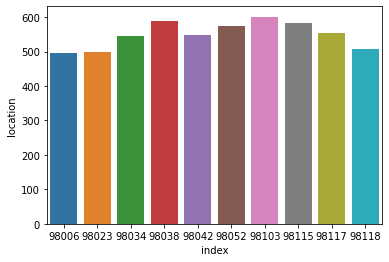

In [34]:
sns.barplot(x = 'index',y = 'location',data = s2)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

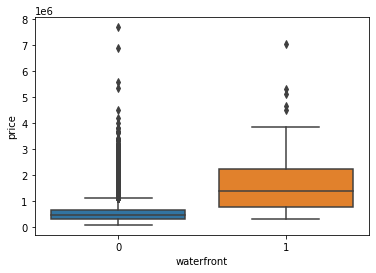

In [37]:
sns.boxplot(x=sale['waterfront'], y=sale['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

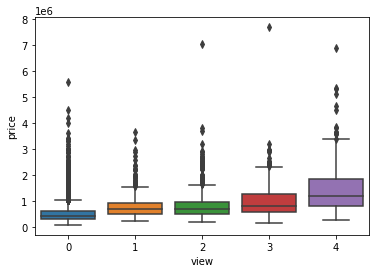

In [38]:
sns.boxplot(x='view', y='price', data=sale)

### Relational plot

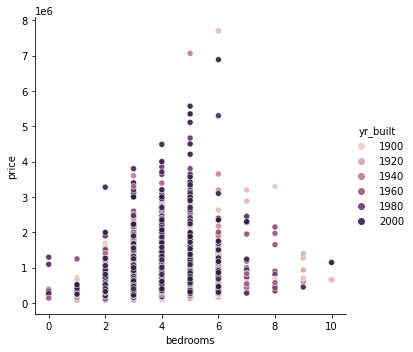

In [39]:
sns.relplot(x = "bedrooms", y = "price", hue ="yr_built", data = sale)

<AxesSubplot:xlabel='floors', ylabel='price'>

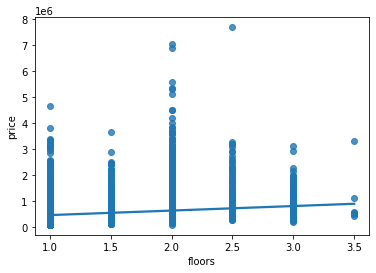

In [40]:
sns.regplot(x="floors", y="price", data = sale)

### Scatter plot

<AxesSubplot:xlabel='floors', ylabel='price'>

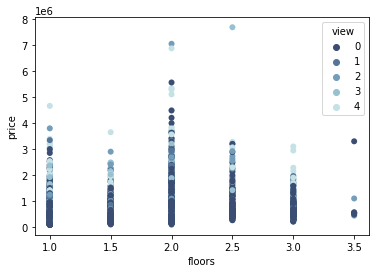

In [41]:
sns.scatterplot(x="floors", y="price",
                hue="view",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=sale)

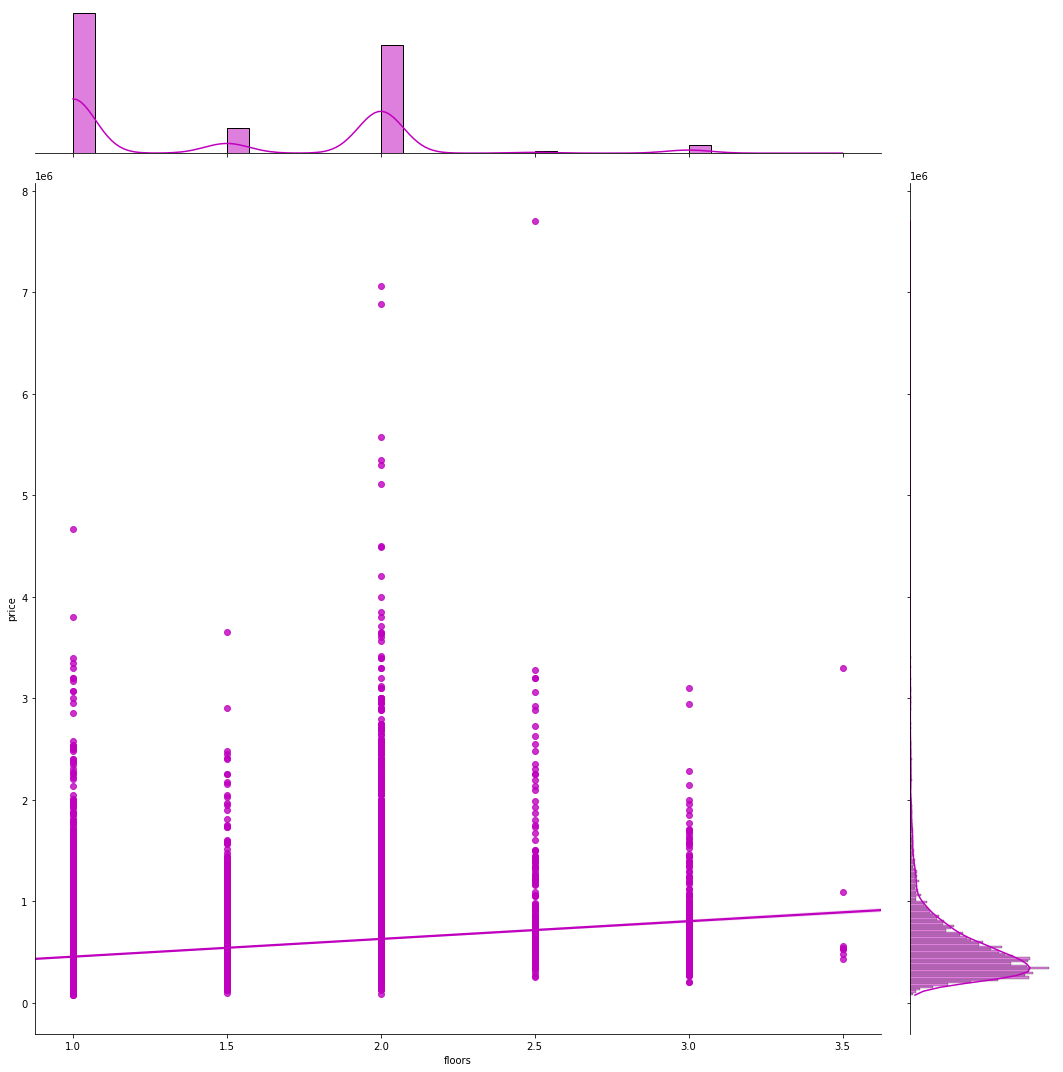

In [42]:
sns.jointplot(x="floors", y="price", data=sale,
                  kind="reg", truncate=False,
                  color="m", height=15)

C:\Users\Deepak K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

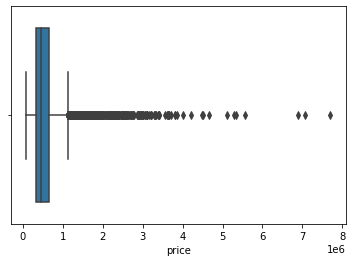

In [33]:
sns.boxplot(sale['price'])

In [ ]:
sns.swarmplot(x = "price", y = "yr_built", hue = "bedrooms", alpha = .5, data = sale)

### pairplot

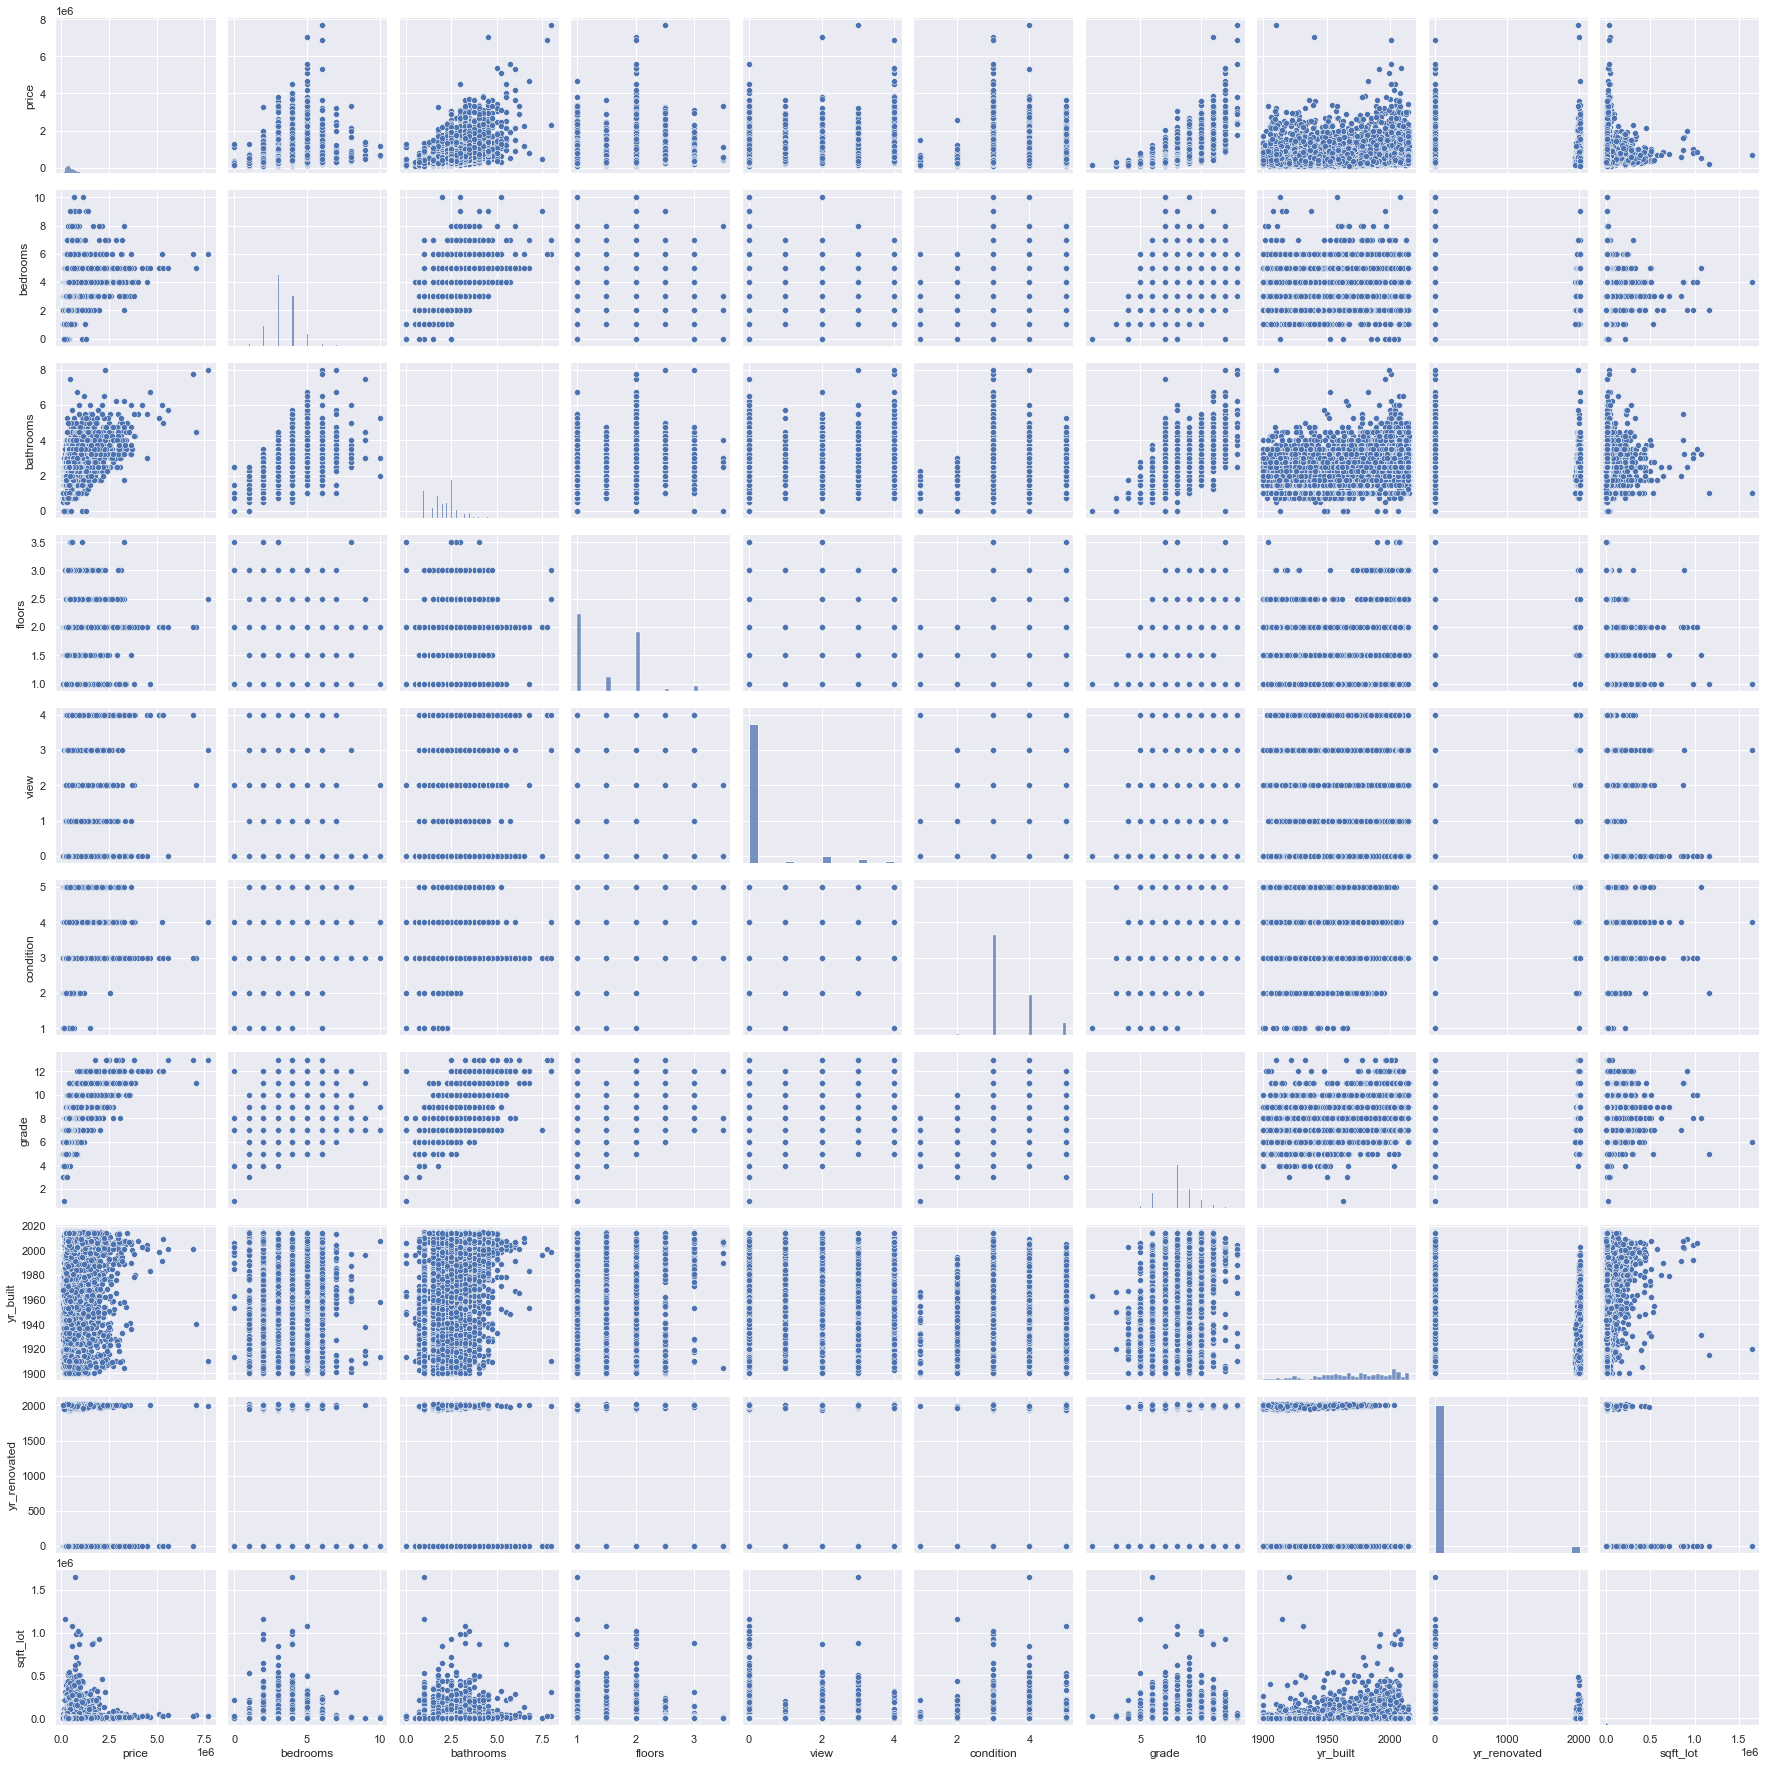

In [32]:
sns.pairplot(df[['price','bedrooms','bathrooms','floors','view','condition','grade','yr_built','yr_renovated','sqft_lot']])

In [6]:
sale.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


#### Heat Map

<AxesSubplot:>

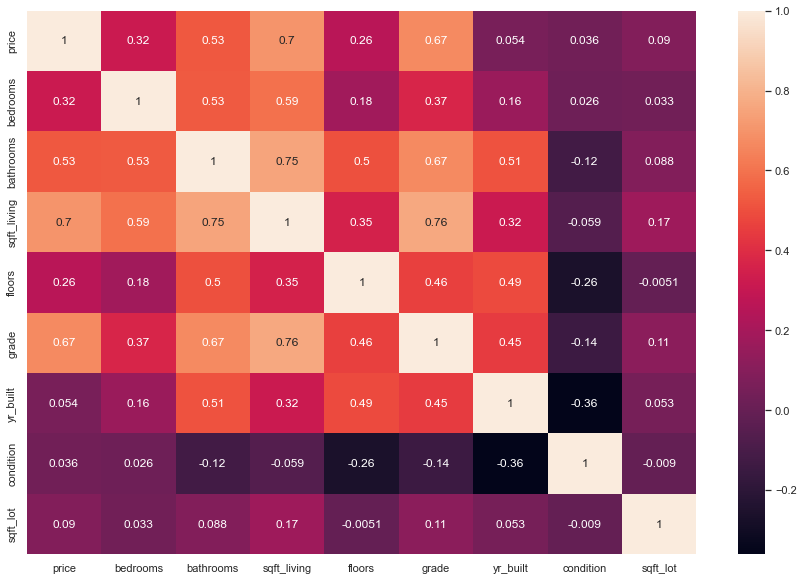

In [33]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition','sqft_lot']
sns.heatmap(df[columns].corr(),annot=True)

#### Correlation Matrix with Heatmap. We can identify which feature most related to price.

# Q(A-2)

### Simple Linear Regression

In [15]:
sale

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Linear regression between Price and Sqft


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

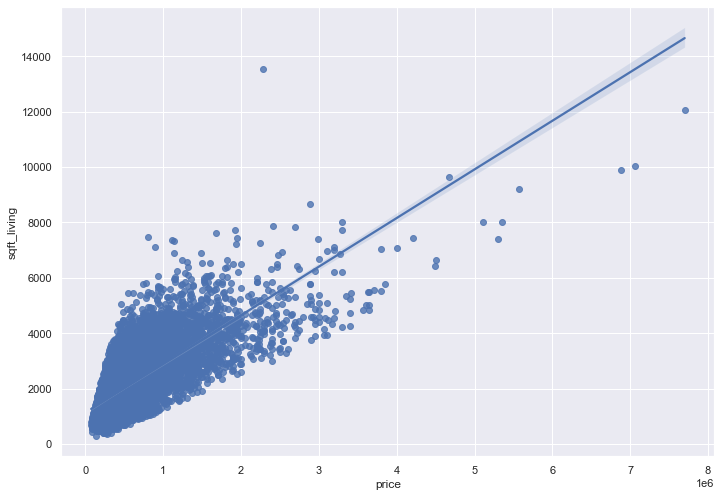

In [68]:
sns.regplot(x="price", y="sqft_living", data = sale)

In [7]:
x = sale.price

In [8]:
y = sale.sqft_living

In [9]:
model = LinearRegression()

In [10]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [11]:
model.intercept_ #beta_0

1131.4250348498758

In [12]:
model.coef_ #beta_1

array([0.00175622])

In [14]:
print("R2 =",(model.score(np.array(x).reshape(-1,1),y)))

R2 = 0.49285336068411656


### Multiple Linear Regression

In [69]:
sale.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


In [71]:
x = sale[['bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode']]
y = sale['price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [73]:
model = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
model.intercept_

9320465.364879929

In [76]:
model.coef_

array([ 4.30851656e+04, -3.74896068e+04,  1.15192685e+02, -2.50676622e-01,
        2.45853368e+04,  5.67989478e+05,  4.43882288e+04,  2.04458373e+04,
        1.25650294e+05,  5.61692991e+01,  5.90233862e+01, -3.59623370e+03,
        1.01367375e+01, -3.15540663e+01])

In [77]:
model.score(X_train, y_train)

0.6558645049458796

In [78]:
model.predict(X_test)

array([338430.10157205, 452810.18836416, 282445.82523687, ...,
       458891.19931873, 489815.82797913, 519294.9785327 ])

In [79]:
y_test.values

array([ 272000.,  390000.,  280000., ..., 1180500.,  358800.,  440000.])

In [80]:
model.score(X_test, model.predict(X_test))

1.0

In [81]:
model.score(X_train, model.predict(X_train))

1.0

In [82]:
model.score(X_test, y_test)

0.6362412506509739

In [83]:
model.score(X_train, y_train)

0.6558645049458796

## Q(A-3)Statsmodel

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [34]:
linear_regression = smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built', data=df)

In [35]:
linear_regression

In [36]:
fitted_model = linear_regression.fit()

In [37]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3693.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:15:49   Log-Likelihood:            -2.9608e+05
No. Observations:               21606   AIC:                         5.922e+05
Df Residuals:                   21594   BIC:                         5.923e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.316e+06   1.31e+05     48.311      0.000    6.06e+06    6.57e+06
bedrooms       -4.27e+04   2114.096    -20.196      0.000   -4.68e+04   -3.86e+04
bathrooms      4.793e+04   3468.275     13.819      0.000    4.11e+04    5.47e+04
sqft_living     115.3698      2.295     50.275      0.000     110.872     119.868
sqft_lot         -0.2601      0.037     -7.104      0.000      -0.332      -0.188
floors         2.455e+04   3734.230      6.575      0.000    1.72e+04    3.19e+04
waterfront     5.744e+05   1.86e+04     30.846      0.000    5.38e+05    6.11e+05
view            4.51e+04   2256.533     19.987      0.000    4.07e+04    4.95e+04
condition      1.791e+04   2465.310      7.265      0.000    1.31e+04    2.27e+04
grade          1.238e+05   2167.261     57.143      0.000     1.2e+05    1.28e+05
sqft_above       56.9055      2.189     25.998      0.000      52.615      61.196
sqft_basement    58.4643      2.788     20.973      0.000      53.000      63.928
yr_built      -3627.0341     67.176    -53.993      0.000   -3758.704   -3495.365
==============================================================================
Omnibus:                    15959.887   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1093033.899
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      37.344   Cond. No.                     6.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.98e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Statsmodels is an extraordinarily helpful package in python for statistical modeling.We can either use statsmodel.formula.api or statsmodel.api to build a linear regression model.